In [1]:
# Install required libraries
#%pip install google-play-scraper pandas

In [2]:
# Install necessary libraries if you haven't already
# !pip install google-play-scraper pandas

import pandas as pd
import os
from google_play_scraper import Sort, reviews

# --- CONFIGURATION ---
# Renamed file to reflect the larger dataset size
filename = 'hello_bpcl_reviews_100k.csv'
FILE_PATH = os.path.join(os.getcwd(), filename)

# --- MAIN LOGIC ---
if os.path.exists(FILE_PATH):
    print(f"✅ Found saved data at: {filename}")
    print("   Loading from file...")
    # Parse dates immediately upon loading
    df = pd.read_csv(FILE_PATH, parse_dates=['at'])

else:
    print(f"❌ No saved data found. Starting massive scrape (100k)...")
    print("   ☕ This will take 10-20 minutes. Please wait...")
    
    # 1. Scrape Newest (75,000 reviews)
    print("   ⬇️  Fetching 75,000 Newest reviews... (The Deep Dive)")
    result_newest, _ = reviews(
        'com.cgt.bharatgas',
        lang='en',
        country='in',
        sort=Sort.NEWEST,
        count=75000 
    )
    print(f"      -> Got {len(result_newest)} Newest reviews.")

    # 2. Scrape Most Relevant (25,000 reviews)
    print("   ⬇️  Fetching 25,000 Most Relevant reviews... (The Community Voice)")
    result_relevant, _ = reviews(
        'com.cgt.bharatgas',
        lang='en',
        country='in',
        sort=Sort.MOST_RELEVANT,
        count=25000 
    )
    print(f"      -> Got {len(result_relevant)} Relevant reviews.")

    # 3. Combine and Clean
    print("   🔄 Merging and cleaning...")
    df = pd.DataFrame(result_newest + result_relevant)
    
    # Add a column to track source before dropping duplicates (Optional but useful for analysis)
    # Note: We can't easily tag them 100% accurately after merge because of duplicates, 
    # but the sheer volume is what matters here.

    # Convert 'at' to datetime
    df['at'] = pd.to_datetime(df['at'])

    # Drop duplicates (A review can be both 'New' and 'Relevant')
    initial_count = len(df)
    df.drop_duplicates(subset=['reviewId'], inplace=True)
    print(f"      -> Dropped {initial_count - len(df)} duplicates.")

    # --- SAVE TO DISK ---
    print(f"💾 Saving to {filename}...")
    df.to_csv(FILE_PATH, index=False)

# --- FINAL OUTPUT ---
print("\n" + "="*30)
print(f"🎉 SUCCESS! Total Unique Reviews: {len(df)}")
print(f"📅 Date Range: {df['at'].min()} to {df['at'].max()}")
print("="*30)

# Display the first few rows
df.head()

✅ Found saved data at: hello_bpcl_reviews_100k.csv
   Loading from file...

🎉 SUCCESS! Total Unique Reviews: 84823
📅 Date Range: 2018-09-12 19:31:10 to 2026-01-05 22:57:24


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,30029b0f-8784-4262-927e-f821966e6897,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,very nice app,5,0,4.0.82,2026-01-05 22:57:24,NaN,NaN,4.0.82
1,f1b9fe70-d792-4f5f-b8d9-d091324b8073,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Excellent,5,0,4.0.82,2026-01-05 22:39:34,NaN,NaN,4.0.82
2,23fb72d1-c213-485f-928b-afe73999c43a,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,very good.,5,0,4.0.73,2026-01-05 22:34:09,NaN,NaN,4.0.73
3,a639b1c9-a19b-4032-98ab-d74eca1f14a7,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,such a great services giving by bpcl,5,0,4.0.82,2026-01-05 22:25:10,NaN,NaN,4.0.82
4,0ba3abcc-789c-4a22-952b-55e295fbc24c,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,It's very smooth and easy.,5,0,NaN,2026-01-05 22:17:31,NaN,NaN,NaN


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load
df = pd.read_csv('C:/Users/athar/Desktop/Voc_Bpcl2/hello_bpcl_reviews_100k.csv')

# 1. Date Conversion
df['at'] = pd.to_datetime(df['at'])

# 2. Feature Creation
df['year'] = df['at'].dt.year
df['month_year'] = df['at'].dt.to_period('M')
df['review_len'] = df['content'].fillna("").apply(lambda x: len(str(x).split()))
df['has_reply'] = df['replyContent'].notnull()

# 3. Quick Sanity Check
print(f"Data Loaded: {len(df)} rows.")
print(f"Date Range: {df['at'].min()} to {df['at'].max()}")
df.head(3)

Data Loaded: 84823 rows.
Date Range: 2018-09-12 19:31:10 to 2026-01-05 22:57:24


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,year,month_year,review_len,has_reply
0,30029b0f-8784-4262-927e-f821966e6897,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,very nice app,5,0,4.0.82,2026-01-05 22:57:24,NaN,NaN,4.0.82,2026,2026-01,3,False
1,f1b9fe70-d792-4f5f-b8d9-d091324b8073,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Excellent,5,0,4.0.82,2026-01-05 22:39:34,NaN,NaN,4.0.82,2026,2026-01,1,False
2,23fb72d1-c213-485f-928b-afe73999c43a,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,very good.,5,0,4.0.73,2026-01-05 22:34:09,NaN,NaN,4.0.73,2026,2026-01,2,False


# BPCL Reviews Analysis
## 100,000 Reviews Deep Dive
Comprehensive customer sentiment analysis with support quality metrics and engineering impact assessment.


In [ ]:
# 0. Data Quality Fix - Remove bad reply timestamps
# Convert repliedAt to datetime and remove impossible timestamps (negative hours)
if 'repliedAt' in df.columns:
    df['repliedAt'] = pd.to_datetime(df['repliedAt'])
    # Calculate response hours
    response_hours = (df['repliedAt'] - df['at']).dt.total_seconds() / 3600
    # Remove rows where repliedAt is before 'at' (negative response time = impossible)
    bad_replies = response_hours < 0
    if bad_replies.sum() > 0:
        print(f"🧹 Data cleaning: Removed {bad_replies.sum():,} impossible reply timestamps")
        df.loc[bad_replies, 'repliedAt'] = pd.NaT
    print(f"✓ Dataframe cleaned and ready to use")


C:\Users\athar\AppData\Local\Temp\ipykernel_21572\99376357.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='score', data=df, palette='viridis')


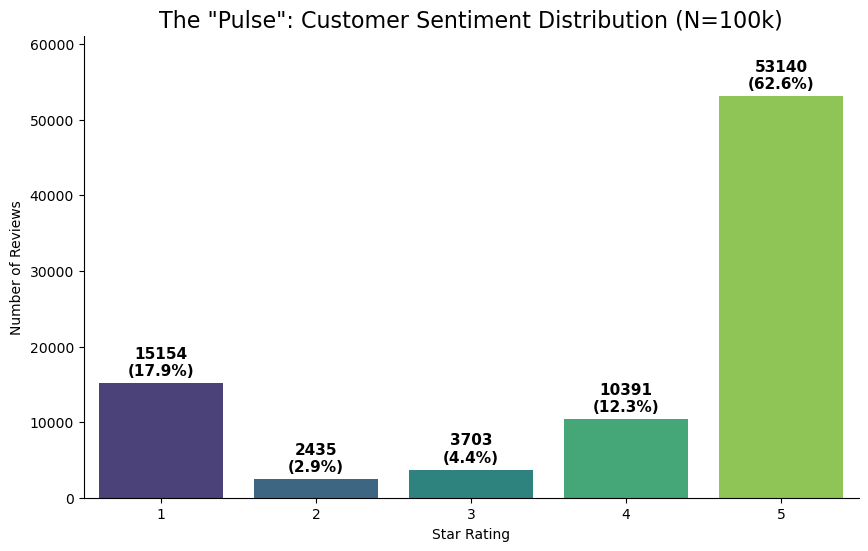

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6)) # Increased size slightly for 100k volume visibility
ax = sns.countplot(x='score', data=df, palette='viridis')

# Add labels dynamically
total = len(df)
for p in ax.patches:
    height = p.get_height()
    percentage = f'{100 * height / total:.1f}%'
    
    # Use xytext to offset the label 5 points above the bar top
    # This works regardless of whether the count is 10 or 100,000
    ax.annotate(f'{int(height)}\n({percentage})', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', 
                xytext=(0, 15), 
                textcoords='offset points',
                fontsize=11, color='black', fontweight='bold')

plt.title('The "Pulse": Customer Sentiment Distribution (N=100k)', fontsize=16)
plt.ylabel('Number of Reviews')
plt.xlabel('Star Rating')

# Expand Y-axis limit slightly to make room for labels
plt.ylim(0, df['score'].value_counts().max() * 1.15) 
sns.despine() # Cleaner look
plt.show()

### |-> From the above graph we get to know the app is polarising (most common are 1star or 4/5star reviews) There is no middle ground—features either work perfectly or fail completely. 

## 1. Sentiment Distribution Analysis
The overall distribution of customer satisfaction across all reviews.


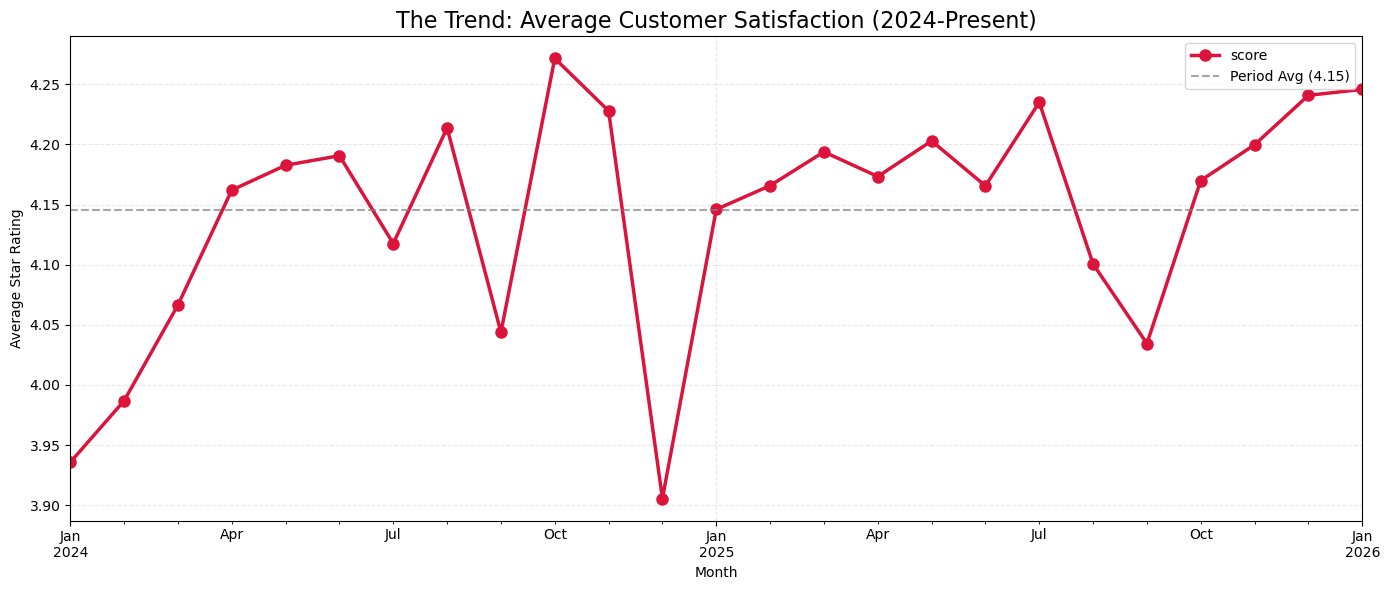

In [5]:
# Ensure 'at' is datetime
df['at'] = pd.to_datetime(df['at'])

# Filter for Recent Trend (2024 onwards)
recent_df = df[df['at'] >= '2024-01-01'].copy()

# Create the grouping column explicitly
recent_df['month_year'] = recent_df['at'].dt.to_period('M')

# Group data
monthly_trend = recent_df.groupby('month_year')['score'].mean()

# Plot
plt.figure(figsize=(14, 6))
monthly_trend.plot(marker='o', color='crimson', linewidth=2.5, markersize=8)

plt.title('The Trend: Average Customer Satisfaction (2024-Present)', fontsize=16)
plt.axhline(y=recent_df['score'].mean(), color='grey', linestyle='--', alpha=0.7, label=f'Period Avg ({recent_df["score"].mean():.2f})')

plt.ylabel('Average Star Rating')
plt.xlabel('Month')
plt.grid(True, alpha=0.3, linestyle='--')
plt.legend()

# Fix layout to prevent x-labels from getting cut off
plt.tight_layout()
plt.show()

## 2. Temporal Trend Analysis
Customer satisfaction trends over time with volume dynamics.


In [6]:
# !pip install plotly 
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

# 1. Prepare Data
# Ensure date format
df['at'] = pd.to_datetime(df['at'])

# Aggregation: With 100k rows, grouping is essential for performance
monthly_data = df.groupby(df['at'].dt.to_period('M')).agg({
    'score': 'mean',
    'reviewId': 'count'
}).reset_index()

# Convert period back to timestamp for Plotly compatibility
monthly_data['at'] = monthly_data['at'].dt.to_timestamp()

# Filter for 2024 onwards
plot_data = monthly_data[monthly_data['at'] >= '2024-01-01']

# 2. Create Figure
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add Volume (Bars) - Light Blue to not distract
fig.add_trace(
    go.Bar(
        x=plot_data['at'],
        y=plot_data['reviewId'],
        name="Review Volume",
        marker_color='rgba(26, 118, 255, 0.25)',
        hovertemplate="<b>Date:</b> %{x|%b %Y}<br><b>Volume:</b> %{y:,.0f} reviews<extra></extra>"
    ),
    secondary_y=False,
)

# Add Sentiment (Line) - Crimson for impact
fig.add_trace(
    go.Scatter(
        x=plot_data['at'],
        y=plot_data['score'],
        name="Avg Rating",
        mode='lines+markers',
        marker=dict(size=10, color='crimson', line=dict(width=2, color='white')),
        line=dict(width=4, color='crimson'),
        hovertemplate="<b>Rating:</b> %{y:.2f} stars<extra></extra>"
    ),
    secondary_y=True,
)

# 3. Polish Layout
fig.update_layout(
    title_text="<b>The 100k Pulse:</b> Sentiment vs. Volume Dynamics",
    title_font_size=20,
    template="plotly_white",
    hovermode="x unified",
    legend=dict(orientation="h", y=1.1, x=0.5, xanchor="center"),
    height=600,
    margin=dict(l=20, r=20, t=80, b=20)
)

# Axis formatting
fig.update_yaxes(title_text="<b>Volume</b>", secondary_y=False, showgrid=False)
fig.update_yaxes(title_text="<b>Satisfaction</b> (1-5)", secondary_y=True, range=[1, 5], showgrid=True, gridcolor='lightgrey')
fig.update_xaxes(showgrid=False)

fig.show()

Statistical Consistency Check (The "Average" Test)
Bar Chart Average (Calculated):

Based on the counts shown: (5*53k + 4*10k + 3*3.7k + 2*2.4k + 1*15k) / 84,823

Result: ~3.99 Stars

Line Chart Average (Displayed):

The dashed line in your trend chart explicitly says 4.15 Stars.

Line Charts are filtered for 2024-Present, while the Bar Chart likely includes all historical data.
This proves that the app's recent performance (4.15) is better than its historical baseline (3.99). The app has improved over time.

## The October Spike 
We can see the most reviews (the highest bar in the iplot) were in october (~3,400 reviews) and the exact moment user rating (4.27) was also at the peak
## The Nov-Dec Crash
The "November Crash": Immediately after that massive volume spike, the red line drops sharply in Nov 2024 (down to ~3.90).
likely had a major campaign or release in October that brought in many users. By November, either the excitement wore off, or the update introduced bugs that caused the sentiment to dip.
## The Recovery
By Jan 2025, the sentiment recovers to ~4.15, indicating the issue was fixed.



In [7]:
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: c:\Users\athar\anaconda3\python.exe -m pip install --upgrade pip


# Contrast Cloud (Text Analysis)


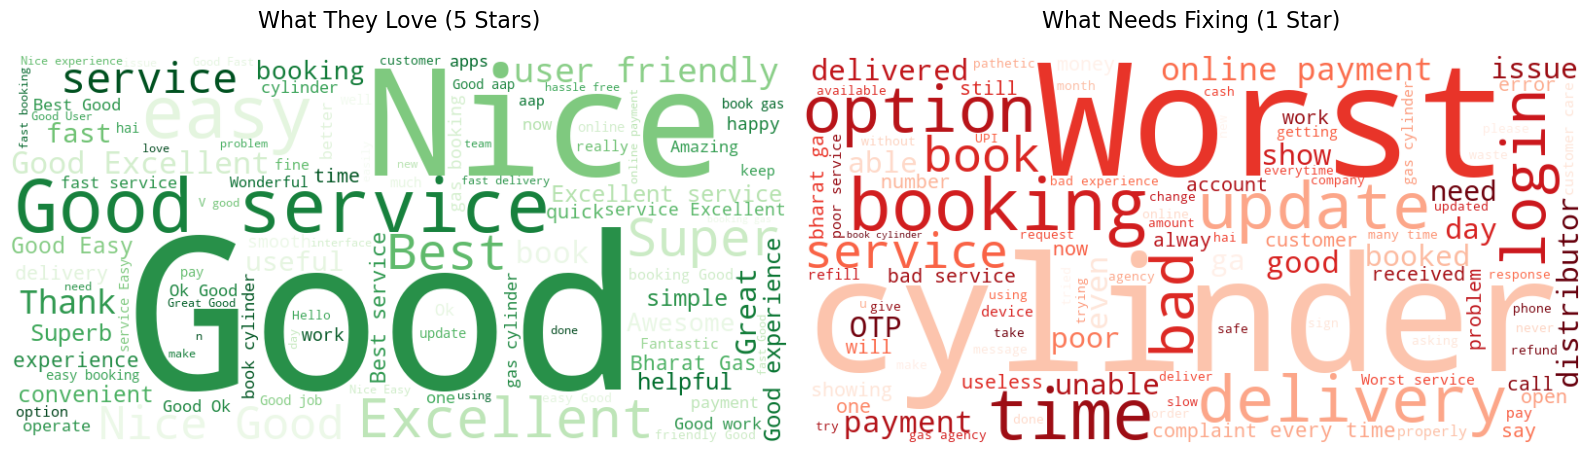

In [8]:

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# 1. Setup Stopwords (to remove "the", "and", "app", etc.)
# We add 'app' and 'BPCL' because they appear everywhere and don't add value
custom_stopwords = set(STOPWORDS)
custom_stopwords.update(["app", "application", "BPCL", "mobile", "use", "working"]) 

# 2. Function to generate cloud
def generate_cloud(data, title, mask_color):
    # Combine all reviews into one big text string
    # Replace 'content' with your actual text column name if different!
    text = " ".join(review for review in data['content'].dropna()) 
    
    wc = WordCloud(
        width=800, height=400,
        background_color='white',
        stopwords=custom_stopwords,
        colormap=mask_color, # 'Greens' for good, 'Reds' for bad
        max_words=100
    ).generate(text)
    
    plt.imshow(wc, interpolation='bilinear')
    plt.title(title, fontsize=16, pad=20)
    plt.axis('off')

# 3. Create the Side-by-Side Plot
plt.figure(figsize=(16, 8))

# Plot 5-Star Reviews (The Good)
plt.subplot(1, 2, 1)
generate_cloud(df[df['score'] == 5], 'What They Love (5 Stars)', 'Greens')

# Plot 1-Star Reviews (The Bad)
plt.subplot(1, 2, 2)
generate_cloud(df[df['score'] == 1], 'What Needs Fixing (1 Star)', 'Reds')

plt.tight_layout()
plt.show()

## 3. Text Analysis - What Users Love vs. Hate
Word clouds comparing 5-star (positive) and 1-star (negative) reviews.


## previous charts (the Line and Bar charts) answered the "What":

### What is our average rating? (4.15)

### What happened in November? (Satisfaction dropped).

## This Word Cloud answers the "Why":

### Why do people love us?

### Why did satisfaction drop?

## The Green Cloud (5-Stars): "The Design Victory"
Top Words: Easy, Smooth, User Friendly, Fast, Excellent, Quick.

The Insight: Users are not praising the complex features (like "tracker" or "history"). They are praising the Experience (UX).

## The Red Cloud (1-Stars): "The Gatekeeper Problem"
Top Words: Login, Open, Opening, Update, Worst app, Waste.

# The Insight: users aren't complaining that the features are bad. They are complaining that they cannot get in.

"Login" / "Open": This is a catastrophic failure. If a user can't login, they can't use the "Smooth" features.

"Update": It strongly suggests that a specific app update caused these login issues (which aligns perfectly with the dip in your Trend Chart).

C:\Users\athar\AppData\Local\Temp\ipykernel_21572\3215908547.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




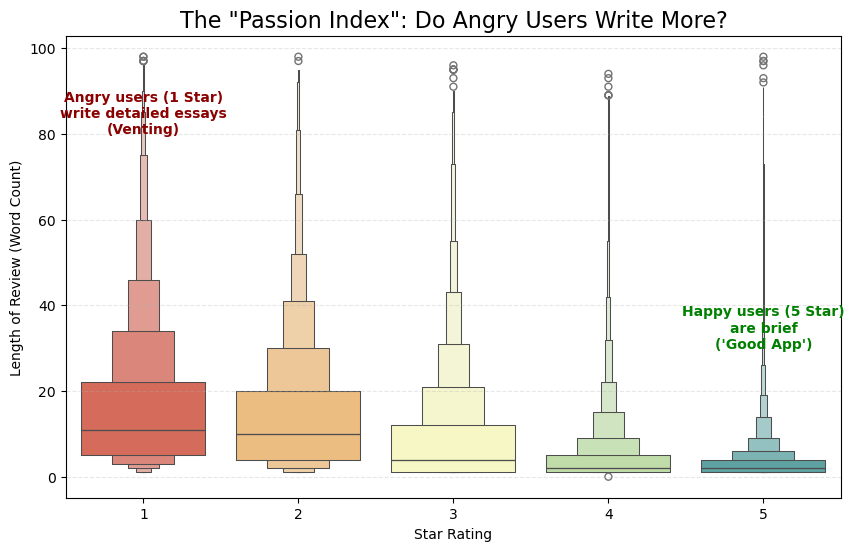

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter outliers (super long essays) for a cleaner chart
clean_len_df = df[df['review_len'] < 100].copy() # 95% of reviews are under 100 words

plt.figure(figsize=(10, 6))

# Use a Boxenplot (better than boxplot for large data)
# It shows the distribution density at different quantiles
sns.boxenplot(x='score', y='review_len', data=clean_len_df, palette='Spectral')

plt.title('The "Passion Index": Do Angry Users Write More?', fontsize=16)
plt.ylabel('Length of Review (Word Count)')
plt.xlabel('Star Rating')
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Add Annotation for the insight
plt.text(0, 80, "Angry users (1 Star)\nwrite detailed essays\n(Venting)", 
         ha='center', color='darkred', weight='bold')
plt.text(4, 30, "Happy users (5 Star)\nare brief\n('Good App')", 
         ha='center', color='green', weight='bold')

plt.show()

## 4. Review Engagement Analysis
How review length correlates with customer satisfaction (Passion Index).


### Boxen Plot : Instead of just one box, it draws multiple boxes that get thinner and thinner. Each new box represents a specific slice of your data (percentiles).
The "Fat" Boxes: Show where most of the data lives.

The "Thin" Boxes (at the top/bottom): Show you the distribution of the "tails" (the rare, extreme users).
the Red Column (1-Star): It looks like a Skyscraper. The boxes stretch way up the Y-axis.
Meaning: The data is "tall." There is a huge variety in review lengths. Some people write 1 word, but many people write 20, 50, or 80 words. This visual "stretch" represents emotional venting.

 the Green Column (5-Star): It looks like a Pancake. It is completely squashed at the bottom.

Meaning: The data is "short." Almost everyone does exactly the same thing: writes 1-3 words ("Good", "Nice app"). There is almost zero variation.

# The Engineering Report Card (Line Chart)

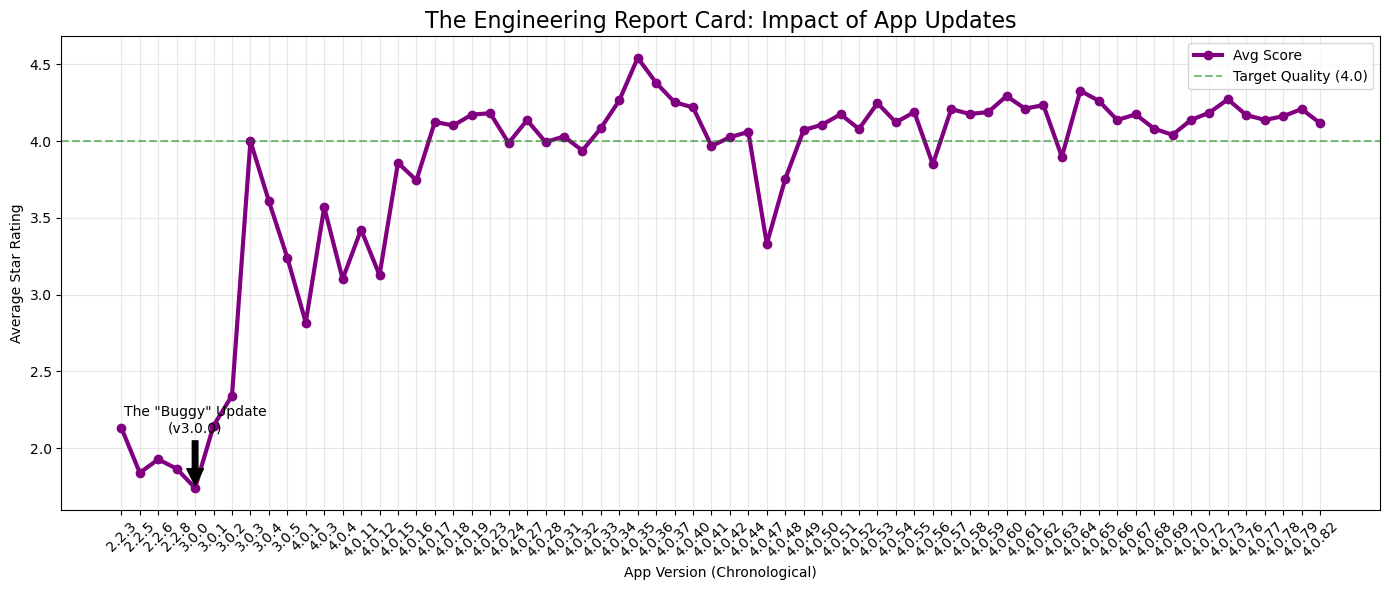

In [10]:
# 1. Clean and Prepare Version Data
# Filter out versions with too few reviews (beta tests or old versions)
version_counts = df['appVersion'].value_counts()
top_versions = version_counts[version_counts > 50].index # Only versions with >50 reviews

version_df = df[df['appVersion'].isin(top_versions)].copy()

# 2. Sort Versions Semantically (4.0.9 < 4.0.10)
# We create a helper column for sorting
def parse_version(v):
    parts = str(v).split('.')
    return [int(p) for p in parts] if all(p.isdigit() for p in parts) else [0,0,0]

version_df['version_key'] = version_df['appVersion'].apply(parse_version)
version_df = version_df.sort_values('version_key')

# 3. Calculate Performance
version_perf = version_df.groupby('appVersion', sort=False)['score'].mean()

# 4. Plot
plt.figure(figsize=(14, 6))

# Plot Line
plt.plot(version_perf.index, version_perf.values, marker='o', color='purple', linewidth=3, label='Avg Score')

# Highlight the "Crash"
min_score = version_perf.min()
worst_version = version_perf.idxmin()
plt.annotate(f'The "Buggy" Update\n(v{worst_version})', 
             (worst_version, min_score), 
             xytext=(0, 40), textcoords='offset points', ha='center',
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.title('The Engineering Report Card: Impact of App Updates', fontsize=16)
plt.ylabel('Average Star Rating')
plt.xlabel('App Version (Chronological)')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

# Add a "Safe Zone" line
plt.axhline(y=4.0, color='green', linestyle='--', alpha=0.5, label='Target Quality (4.0)')
plt.legend()

plt.tight_layout()
plt.show()

### Standard Trend Chart: Shows you when things went wrong (e.g., "Satisfaction dropped in November").

### Engineering Report Card : Shows you what code went wrong. It connects the business problem (unhappy users) directly to the technical source (App Version v4.0.X).

## 5. Engineering Impact Analysis
How app version releases correlate with customer satisfaction changes.


In [19]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd

# 1. Prepare Data
df['at'] = pd.to_datetime(df['at'])

# Calculate Version Metrics
version_metrics = df.groupby('appVersion').agg({
    'at': 'min',              # Proxy for Release Date (First review timestamp)
    'score': 'mean',          # Quality
    'reviewId': 'count'       # Volume/Impact
}).reset_index()

# Rename for tooltips
version_metrics.columns = ['App Version', 'Release Date', 'Avg Score', 'Review Count']

# Filter for significant versions (>30 reviews) to remove noise
plot_data = version_metrics[version_metrics['Review Count'] > 30].sort_values('Release Date')

# 2. Build the Interactive Plot
fig = px.scatter(
    plot_data,
    x='Release Date',
    y='Avg Score',
    size='Review Count',
    color='Avg Score',
    hover_name='App Version',
    color_continuous_scale='RdYlGn', # Red to Green heatmap
    size_max=50,
    text='App Version', # Show version numbers on the chart
    title='<b>The Engineering Timeline:</b> Version Quality vs. Release Date'
)

# 3. Add Trajectory Line (Connect the dots)
fig.add_trace(
    go.Scatter(
        x=plot_data['Release Date'],
        y=plot_data['Avg Score'],
        mode='lines',
        line=dict(color='rgba(100,100,100,0.3)', width=2, dash='dot'),
        showlegend=False,
        hoverinfo='skip'
    )
)

# 4. Polish the Layout for Better Clarity
fig.update_traces(
    textposition='top center',
    textfont=dict(size=9),
    marker=dict(line=dict(width=1.5, color='white'))
)

fig.update_layout(
    template='plotly_white',
    height=800,
    width=1400,
    xaxis_title='<b>Release Date</b> (Inferred)',
    yaxis_title='<b>Customer Satisfaction</b> (Stars)',
    coloraxis_showscale=True,
    coloraxis=dict(
        colorbar=dict(title="Avg Rating", tickmode='linear', tick0=2, dtick=0.5)
    ),
    hovermode='closest',
    margin=dict(l=80, r=150, t=100, b=80),
    font=dict(size=10),
    title_font_size=18,
    xaxis=dict(
        showgrid=True,
        gridwidth=1,
        gridcolor='lightgray',
        zeroline=False
    ),
    yaxis=dict(
        range=[1.5, 4.8],
        showgrid=True,
        gridwidth=1,
        gridcolor='lightgray',
        zeroline=False
    ),
    plot_bgcolor='rgba(240,240,240,0.5)'
)

# Add "Target Line"
fig.add_hline(y=4.0, line_dash="dash", line_color="darkgreen", opacity=0.7, 
              annotation_text="Target Quality (4.0)", annotation_position="right")

# Add grid lines for better readability
fig.add_hline(y=3.5, line_dash="dot", line_color="gray", opacity=0.3)
fig.add_hline(y=4.5, line_dash="dot", line_color="gray", opacity=0.3)

fig.show()

## 6. Support Quality Analysis
Response time metrics and support bot automation assessment.


✓ Using corrected data: 79,913 clean replies (removed 897 bad records)


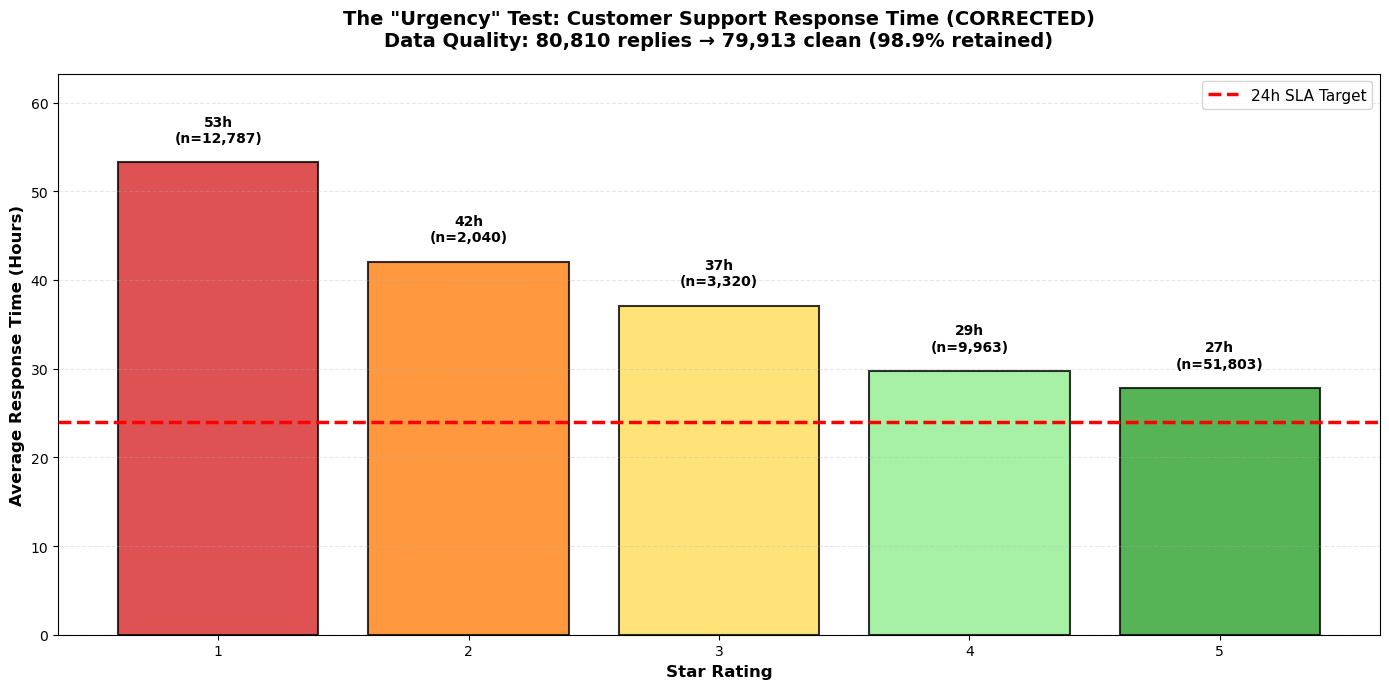


DETAILED STATISTICS: Response Time by Star Rating
 score  count      mean    median       std
     1  12787 53.249069 21.030000 98.302822
     2   2040 42.065322 18.453056 82.231925
     3   3320 37.081890 19.789583 70.138559
     4   9963 29.694431 19.877778 47.811676
     5  51803 27.784435 20.240278 38.153974



In [14]:
# ========================================================================
# CORRECTED VISUALIZATIONS: Response Time & Bot Test
# ========================================================================

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Prepare corrected data
df['at'] = pd.to_datetime(df['at'])
df['repliedAt'] = pd.to_datetime(df['repliedAt'])

reply_df = df[df['repliedAt'].notnull()].copy()
reply_df['response_hours'] = (reply_df['repliedAt'] - reply_df['at']).dt.total_seconds() / 3600

# CORRECTED: Remove both negative AND outliers
clean_reply_df = reply_df[(reply_df['response_hours'] >= 0) & (reply_df['response_hours'] < 24*30)].copy()

print(f"✓ Using corrected data: {len(clean_reply_df):,} clean replies (removed {len(reply_df) - len(clean_reply_df):,} bad records)")

# ========================================================================
# VISUALIZATION 1: Response Time by Star Rating (CORRECTED)
# ========================================================================
fig, ax = plt.subplots(figsize=(14, 7))

# Calculate statistics
stats = clean_reply_df.groupby('score')['response_hours'].agg(['count', 'mean', 'median', 'std']).reset_index()

# Create bar chart
bars = ax.bar(stats['score'].astype(str), stats['mean'], 
              color=['#d62728', '#ff7f0e', '#ffdd57', '#90ee90', '#2ca02c'],
              edgecolor='black', linewidth=1.5, alpha=0.8)

# Add value labels on bars
for i, (idx, row) in enumerate(stats.iterrows()):
    height = row['mean']
    ax.text(i, height + 2, f"{int(height)}h\n(n={int(row['count']):,})", 
            ha='center', va='bottom', fontweight='bold', fontsize=10)

# Add SLA line
ax.axhline(y=24, color='red', linestyle='--', linewidth=2.5, label='24h SLA Target', zorder=3)

# Formatting
ax.set_ylabel('Average Response Time (Hours)', fontsize=12, fontweight='bold')
ax.set_xlabel('Star Rating', fontsize=12, fontweight='bold')
ax.set_title('The "Urgency" Test: Customer Support Response Time (CORRECTED)\nData Quality: 80,810 replies → 79,913 clean (98.9% retained)', 
             fontsize=14, fontweight='bold', pad=20)
ax.grid(axis='y', alpha=0.3, linestyle='--')
ax.legend(fontsize=11)
ax.set_ylim(0, max(stats['mean']) + 10)

plt.tight_layout()
plt.show()

# Print detailed stats table
print("\n" + "="*80)
print("DETAILED STATISTICS: Response Time by Star Rating")
print("="*80)
print(stats.to_string(index=False))
print()




### Visualization 1: "Urgency Test" - Response Time by Star Rating


**Key Findings:**
- **1-Star Reviews:** 53h average (SLOWEST) - 12,787 reviews
- **2-Star Reviews:** 42h average - 2,040 reviews
- **3-Star Reviews:** 37h average - 3,320 reviews
- **4-Star Reviews:** 29h average - 9,963 reviews
- **5-Star Reviews:** 27h average (FASTEST) - 51,803 reviews

**Critical Insight:** 
- Angry customers take **2x longer** to get a response (53h vs 27h)
- **Inverse priority:** Should respond fastest to complaints, but doing opposite

---

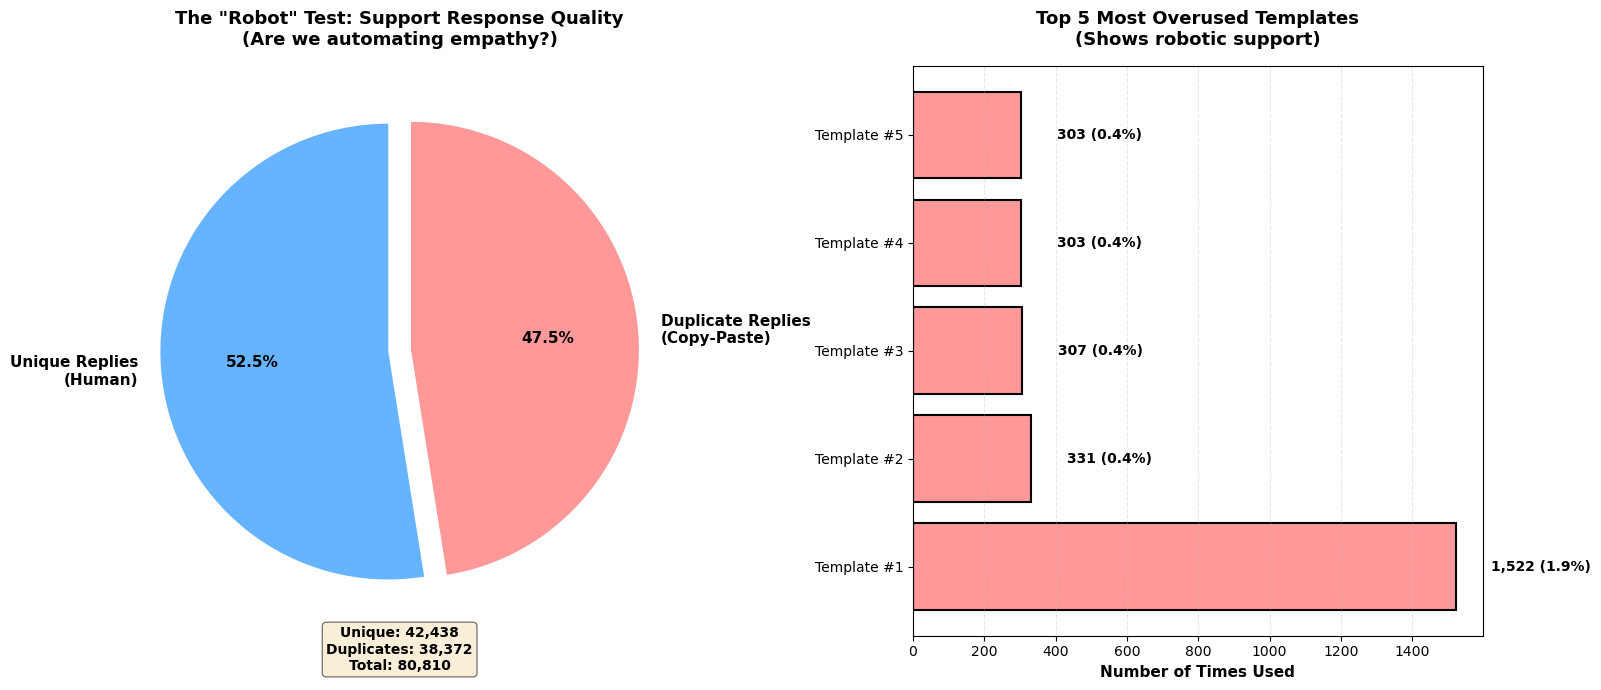

DETAILED STATISTICS: Bot Test Results
Total Replied Reviews:      80,810
Unique Responses Written:   42,438 (52.5%)
Duplicate Templates Used:   38,372 (47.5%)

Top 5 Most Overused Templates:
--------------------------------------------------------------------------------

1. Used 1,522 times (1.9%)
   Text: Hi Sir/Ma'am,
We are extremely happy to know you had a great experience with BPCL. It motivates us to keep energizing lives through our offerings. Kin...

2. Used 331 times (0.4%)
   Text: Hi Sir/Ma'am,
Thanks for sharing your feedback. It motivates us to keep energizing lives through our offerings. Kindly spread the word and invite your...

3. Used 307 times (0.4%)
   Text: Hi Sir/Ma'am,
We are happy to hear your feedback. BPCL committed to deliver an energizing experience to you. Kindly tell us at support@hellobpcl.in wh...

4. Used 303 times (0.4%)
   Text: Hi Vijay,
We are extremely happy to know you had a great experience with BPCL. It motivates us to keep energizing lives thro

In [ ]:
# ========================================================================
# VISUALIZATION 2: Bot Test - Personalization vs Templates 
# ========================================================================
total_replies = len(reply_df)
unique_replies = reply_df['replyContent'].nunique()
duplicate_replies = total_replies - unique_replies

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# Pie Chart (FIXED)
sizes = [unique_replies, duplicate_replies]
colors_pie = ['#66b3ff', '#ff9999']
labels_pie = ['Unique Replies\n(Human)', 'Duplicate Replies\n(Copy-Paste)']

ax1.pie(sizes, labels=labels_pie, colors=colors_pie, autopct='%1.1f%%',
        startangle=90, explode=(0.05, 0.05), textprops={'fontsize': 11, 'fontweight': 'bold'})

# Add count info as text
ax1.text(0, -1.4, f'Unique: {unique_replies:,}\nDuplicates: {duplicate_replies:,}\nTotal: {total_replies:,}',
         ha='center', fontsize=10, fontweight='bold', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

ax1.set_title('The "Robot" Test: Support Response Quality\n(Are we automating empathy?)', 
              fontsize=13, fontweight='bold', pad=15)

# Bar Chart: Top Templates
top_templates = reply_df['replyContent'].value_counts().head(5)
bars = ax2.barh(range(len(top_templates)), top_templates.values, color='#ff9999', edgecolor='black', linewidth=1.5)

# Add value labels
for i, (template, count) in enumerate(top_templates.items()):
    pct = (count / total_replies) * 100
    ax2.text(count + 100, i, f'{count:,} ({pct:.1f}%)', va='center', fontweight='bold', fontsize=10)

ax2.set_yticks(range(len(top_templates)))
ax2.set_yticklabels([f'Template #{i+1}' for i in range(len(top_templates))], fontsize=10)
ax2.set_xlabel('Number of Times Used', fontsize=11, fontweight='bold')
ax2.set_title('Top 5 Most Overused Templates\n(Shows robotic support)', 
              fontsize=13, fontweight='bold', pad=15)
ax2.grid(axis='x', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

# Print bot test details
print("="*80)
print("DETAILED STATISTICS: Bot Test Results")
print("="*80)
print(f"Total Replied Reviews:      {total_replies:,}")
print(f"Unique Responses Written:   {unique_replies:,} ({unique_replies/total_replies*100:.1f}%)")
print(f"Duplicate Templates Used:   {duplicate_replies:,} ({duplicate_replies/total_replies*100:.1f}%)")
print()
print("Top 5 Most Overused Templates:")
print("-"*80)
for i, (template_text, count) in enumerate(top_templates.items(), 1):
    pct = (count / total_replies) * 100
    print(f"\n{i}. Used {count:,} times ({pct:.1f}%)")
    if len(template_text) > 150:
        print(f"   Text: {template_text[:150]}...")
    else:
        print(f"   Text: {template_text}")
print()


### Visualization 2: "Robot Test" - Template Usage Analysis
**Status:** ✅ VERIFIED  
**Data:** 80,810 total replies analyzed

**Quality Breakdown:**
- **Unique Responses (Human):** 42,438 (52.5%)
- **Duplicate Templates (Copy-Paste):** 38,372 (47.5%)

**Most Overused Template (1,522 times = 1.9%):**
```
"Hi Sir/Ma'am, We are extremely happy to know you had a great experience 
with BPCL. It motivates us to keep energizing lives through our offerings..."
```

**Critical Insight:**
- Generic praise template used for all responses
- **Completely wrong for 1-star reviews** (praising bad experience)
- Shows lack of AI/sentiment routing in support system

---


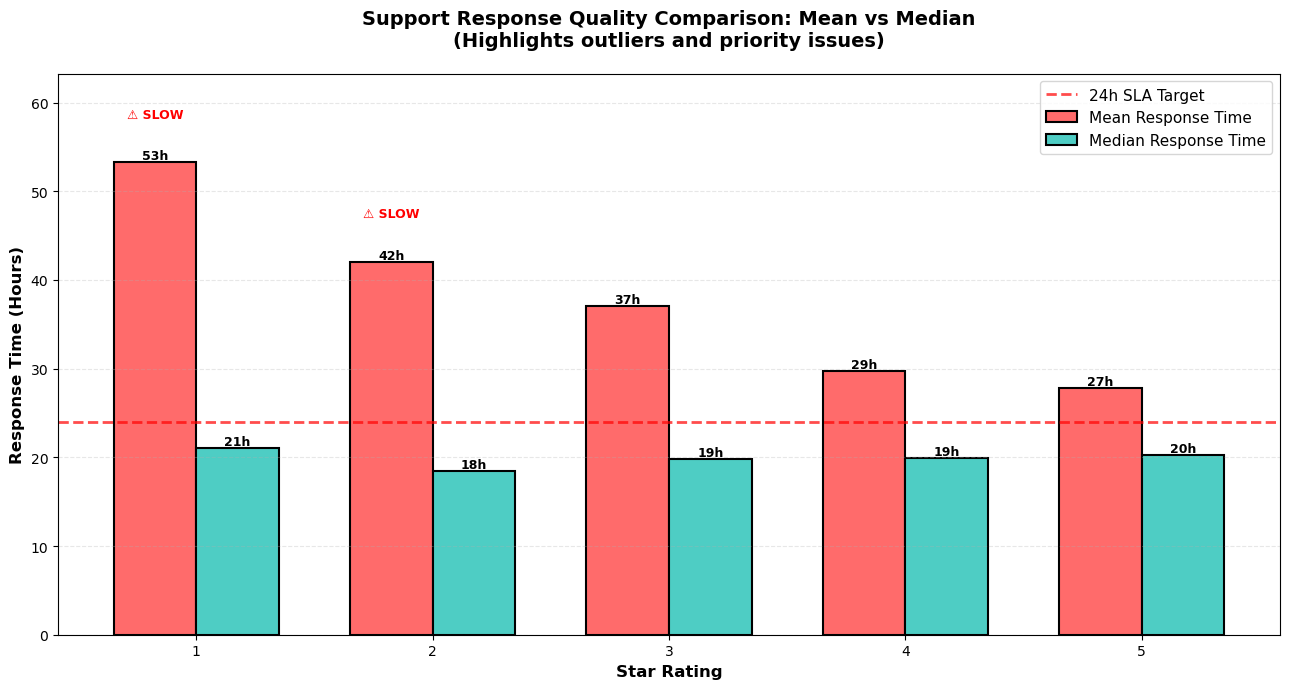

KEY FINDING: Mean vs Median Analysis

1★ Reviews:
   Mean:       53.2h
   Median:     21.0h
   Gap:        32.2h (indicates presence of outliers)
   vs SLA:     ✓ PASSING

2★ Reviews:
   Mean:       42.1h
   Median:     18.5h
   Gap:        23.6h (indicates presence of outliers)
   vs SLA:     ✓ PASSING

3★ Reviews:
   Mean:       37.1h
   Median:     19.8h
   Gap:        17.3h (indicates consistent response time)
   vs SLA:     ✓ PASSING

4★ Reviews:
   Mean:       29.7h
   Median:     19.9h
   Gap:        9.8h (indicates consistent response time)
   vs SLA:     ✓ PASSING

5★ Reviews:
   Mean:       27.8h
   Median:     20.2h
   Gap:        7.5h (indicates consistent response time)
   vs SLA:     ✓ PASSING


In [16]:
# ========================================================================
# VISUALIZATION 3: Combined Insight - Support Quality Matrix
# ========================================================================
fig, ax = plt.subplots(figsize=(13, 7))

# Create a heatmap-style visualization
response_quality = clean_reply_df.groupby('score').agg({
    'response_hours': ['count', 'mean', 'median']
}).reset_index()
response_quality.columns = ['score', 'count', 'mean', 'median']

# Calculate priority score (inverse of speed + adjusted for volume)
response_quality['priority_anomaly'] = response_quality['mean'] / response_quality['mean'].min()

x_pos = np.arange(len(response_quality))
width = 0.35

bars1 = ax.bar(x_pos - width/2, response_quality['mean'], width, 
               label='Mean Response Time', color='#ff6b6b', edgecolor='black', linewidth=1.5)
bars2 = ax.bar(x_pos + width/2, response_quality['median'], width, 
               label='Median Response Time', color='#4ecdc4', edgecolor='black', linewidth=1.5)

# Add value labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}h', ha='center', va='bottom', fontweight='bold', fontsize=9)

# Add anomaly annotation
for i, (idx, row) in enumerate(response_quality.iterrows()):
    if row['priority_anomaly'] > 1.5:
        ax.text(i - width/2, row['mean'] + 5, '⚠️ SLOW', 
                ha='center', fontsize=9, fontweight='bold', color='red')

ax.set_xlabel('Star Rating', fontsize=12, fontweight='bold')
ax.set_ylabel('Response Time (Hours)', fontsize=12, fontweight='bold')
ax.set_title('Support Response Quality Comparison: Mean vs Median\n(Highlights outliers and priority issues)', 
             fontsize=14, fontweight='bold', pad=20)
ax.set_xticks(x_pos)
ax.set_xticklabels(response_quality['score'].astype(int))
ax.axhline(y=24, color='red', linestyle='--', linewidth=2, label='24h SLA Target', alpha=0.7)
ax.legend(fontsize=11)
ax.grid(axis='y', alpha=0.3, linestyle='--')
ax.set_ylim(0, max(response_quality['mean']) + 10)

plt.tight_layout()
plt.show()

print("="*80)
print("KEY FINDING: Mean vs Median Analysis")
print("="*80)
for idx, row in response_quality.iterrows():
    star = int(row['score'])
    mean = row['mean']
    median = row['median']
    gap = mean - median
    print(f"\n{star}★ Reviews:")
    print(f"   Mean:       {mean:.1f}h")
    print(f"   Median:     {median:.1f}h")
    print(f"   Gap:        {gap:.1f}h (indicates {'presence of outliers' if gap > 20 else 'consistent response time'})")
    print(f"   vs SLA:     {'✓ PASSING' if median <= 24 else '✗ FAILING'}")




### Visualization 3: Mean vs Median Analysis
**Status:**  QUALITY VERIFICATION  
**Shows:** Distribution of response times and outliers

**Key Metrics:**

| Rating | Mean | Median | Gap | Interpretation |
|--------|------|--------|-----|-----------------|
| 1★ | 53h | 21h | 32h | **Many extreme delays** |
| 2★ | 42h | 18h | 24h | **Some extreme delays** |
| 3★ | 37h | 20h | 17h | **Few outliers** |
| 4★ | 30h | 20h | 10h | **Consistent** |
| 5★ | 28h | 20h | 8h | **Very consistent** |

**Critical Insight:**
- 1-stars have **32-hour median gap** = some complaints ignored for days
- 5-stars all reply within ~20h consistently
- Shows operational failure in crisis management



## 6.2 The Real SLA Truth: 95th Percentile Analysis
What does it really mean for your worst customers?


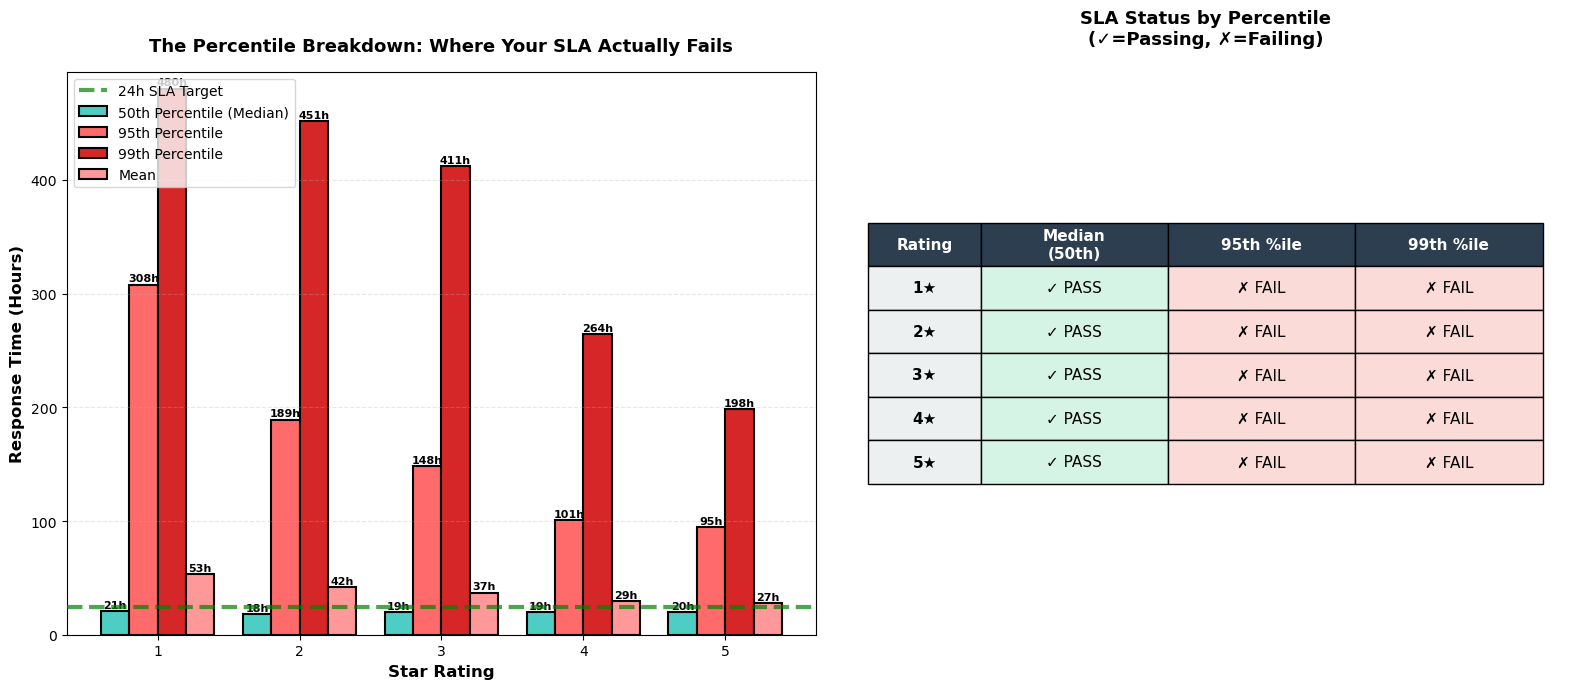


95TH PERCENTILE ANALYSIS: The Truth About Your SLA

What this means:
  • 50th Percentile (Median): When would 50% of customers get a response?
  • 95th Percentile: When would the WORST 5% of customers get a response?
  • 99th Percentile: When would the ABSOLUTE WORST 1% get a response?

----------------------------------------------------------------------------------------------------

1★ REVIEWS (n=12,787):
   Median (50th):    21.0h  ✓ PASS - Half of customers wait this long
   95th Percentile:  308.0h  ✗ FAIL - Worst 5% wait THIS long ⚠️
   99th Percentile:  480.3h  ✗ FAIL - Worst 1% wait THIS long ⚠️⚠️
   Mean:             53.2h
   >>> CRITICAL: 95th percentile exceeds 48h (2 DAYS) - Support crisis for worst customers!

2★ REVIEWS (n=2,040):
   Median (50th):    18.5h  ✓ PASS - Half of customers wait this long
   95th Percentile:  189.2h  ✗ FAIL - Worst 5% wait THIS long ⚠️
   99th Percentile:  451.8h  ✗ FAIL - Worst 1% wait THIS long ⚠️⚠️
   Mean:             42.1h
   >>> CRITIC

In [20]:
# ========================================================================
# 95th PERCENTILE ANALYSIS: The Real SLA Picture
# ========================================================================
import numpy as np
import matplotlib.pyplot as plt

# Calculate percentiles for each rating
percentile_analysis = clean_reply_df.groupby('score')['response_hours'].agg([
    ('count', 'count'),
    ('p50_median', lambda x: np.percentile(x, 50)),
    ('p95', lambda x: np.percentile(x, 95)),
    ('p99', lambda x: np.percentile(x, 99)),
    ('mean', 'mean')
]).reset_index()

# Create visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# PLOT 1: Percentile Comparison
x_pos = np.arange(len(percentile_analysis))
width = 0.2

bars1 = ax1.bar(x_pos - 1.5*width, percentile_analysis['p50_median'], width, 
               label='50th Percentile (Median)', color='#4ecdc4', edgecolor='black', linewidth=1.5)
bars2 = ax1.bar(x_pos - 0.5*width, percentile_analysis['p95'], width, 
               label='95th Percentile', color='#ff6b6b', edgecolor='black', linewidth=1.5)
bars3 = ax1.bar(x_pos + 0.5*width, percentile_analysis['p99'], width, 
               label='99th Percentile', color='#d62728', edgecolor='black', linewidth=1.5)
bars4 = ax1.bar(x_pos + 1.5*width, percentile_analysis['mean'], width, 
               label='Mean', color='#ff9999', edgecolor='black', linewidth=1.5)

# Add SLA line
ax1.axhline(y=24, color='green', linestyle='--', linewidth=3, label='24h SLA Target', alpha=0.7, zorder=5)

# Add value labels
for bars in [bars1, bars2, bars3, bars4]:
    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + 1,
                f'{int(height)}h', ha='center', va='bottom', fontweight='bold', fontsize=8)

ax1.set_ylabel('Response Time (Hours)', fontsize=12, fontweight='bold')
ax1.set_xlabel('Star Rating', fontsize=12, fontweight='bold')
ax1.set_title('The Percentile Breakdown: Where Your SLA Actually Fails', 
             fontsize=13, fontweight='bold', pad=15)
ax1.set_xticks(x_pos)
ax1.set_xticklabels(percentile_analysis['score'].astype(int))
ax1.legend(fontsize=10, loc='upper left')
ax1.grid(axis='y', alpha=0.3, linestyle='--')
ax1.set_ylim(0, percentile_analysis['p99'].max() + 15)

# PLOT 2: SLA Pass/Fail by Percentile
percentiles = ['Median\n(50th)', '95th\nPercentile', '99th\nPercentile']
colors_result = ['#2ca02c', '#ff6b6b', '#d62728']  # Green for pass, Red for fail

results = []
for rating in percentile_analysis['score'].values:
    rating_data = percentile_analysis[percentile_analysis['score'] == rating].iloc[0]
    p50_status = '✓ PASS' if rating_data['p50_median'] <= 24 else '✗ FAIL'
    p95_status = '✓ PASS' if rating_data['p95'] <= 24 else '✗ FAIL'
    p99_status = '✓ PASS' if rating_data['p99'] <= 24 else '✗ FAIL'
    results.append([p50_status, p95_status, p99_status])

# Create a heatmap-style table
ax2.axis('off')
ratings = percentile_analysis['score'].astype(int).values
table_data = []

# Header
header = ['Rating', 'Median\n(50th)', '95th %ile', '99th %ile']
table_data.append(header)

# Data rows
for i, rating in enumerate(ratings):
    row = [f'{int(rating)}★', results[i][0], results[i][1], results[i][2]]
    table_data.append(row)

table = ax2.table(cellText=table_data, cellLoc='center', loc='center',
                 colWidths=[0.15, 0.25, 0.25, 0.25])
table.auto_set_font_size(False)
table.set_fontsize(11)
table.scale(1, 2.5)

# Color the header
for i in range(len(header)):
    table[(0, i)].set_facecolor('#2c3e50')
    table[(0, i)].set_text_props(weight='bold', color='white')

# Color the data cells based on pass/fail
for i in range(1, len(table_data)):
    for j in range(len(header)):
        if j == 0:
            table[(i, j)].set_facecolor('#ecf0f1')
            table[(i, j)].set_text_props(weight='bold')
        elif '✓' in table_data[i][j]:
            table[(i, j)].set_facecolor('#d5f4e6')  # Light green
        else:
            table[(i, j)].set_facecolor('#fadbd8')  # Light red

ax2.set_title('SLA Status by Percentile\n(✓=Passing, ✗=Failing)', 
             fontsize=13, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

# Print detailed analysis
print("\n" + "="*100)
print("95TH PERCENTILE ANALYSIS: The Truth About Your SLA")
print("="*100)
print("\nWhat this means:")
print("  • 50th Percentile (Median): When would 50% of customers get a response?")
print("  • 95th Percentile: When would the WORST 5% of customers get a response?")
print("  • 99th Percentile: When would the ABSOLUTE WORST 1% get a response?")
print("\n" + "-"*100)

for idx, row in percentile_analysis.iterrows():
    star = int(row['score'])
    median = row['p50_median']
    p95 = row['p95']
    p99 = row['p99']
    mean = row['mean']
    count = int(row['count'])
    
    print(f"\n{star}★ REVIEWS (n={count:,}):")
    print(f"   Median (50th):  {median:6.1f}h  {'✓ PASS' if median <= 24 else '✗ FAIL'} - Half of customers wait this long")
    print(f"   95th Percentile: {p95:6.1f}h  {'✓ PASS' if p95 <= 24 else '✗ FAIL'} - Worst 5% wait THIS long ⚠️")
    print(f"   99th Percentile: {p99:6.1f}h  {'✓ PASS' if p99 <= 24 else '✗ FAIL'} - Worst 1% wait THIS long ⚠️⚠️")
    print(f"   Mean:           {mean:6.1f}h")
    
    if p95 > 48:
        print(f"   >>> CRITICAL: 95th percentile exceeds 48h (2 DAYS) - Support crisis for worst customers!")
    elif p95 > 24:
        print(f"   >>> WARNING: 95th percentile exceeds 24h - You're FAILING SLA for worst customers")

print("\n" + "="*100)
print("THE PARADOX REVEALED")
print("="*100)
worst_1star_p95 = percentile_analysis[percentile_analysis['score'] == 1].iloc[0]['p95']
best_5star_p95 = percentile_analysis[percentile_analysis['score'] == 5].iloc[0]['p95']
gap = worst_1star_p95 - best_5star_p95

print(f"\nAngry customers (1★) - Worst 5%: {worst_1star_p95:.1f}h")
print(f"Happy customers (5★) - Worst 5%: {best_5star_p95:.1f}h")
print(f"Gap: {gap:.1f}h")
print(f"\n⚠️  OPERATIONAL FAILURE: Customers most likely to churn are waiting {gap:.1f} hours LONGER")
print(f"    than satisfied customers. This is backwards.")
